# 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
import seaborn as sns

In [2]:
commerce_data=pd.read_csv('ratings.csv',names=['user_id','product_id','rating','time'])
commerce_data.head()

,user_id,product_id,rating,time
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


# 2 Data Understanding

In [3]:
commerce_data.shape

(7824482, 4)

In [4]:
commerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   user_id     object 
 1   product_id  object 
 2   rating      float64
 3   time        int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [5]:
commerce_data.isnull().sum()

user_id       0
product_id    0
rating        0
time          0
dtype: int64

In [6]:
commerce_data.duplicated().sum()

0

In [7]:
commerce_data.describe(include='all').round()

,user_id,product_id,rating,time
count,7824482,7824482,7824482.0,7.824482e+06
unique,4201696,476002,NaN,NaN
top,A5JLAU2ARJ0BO,B0074BW614,NaN,NaN
freq,520,18244,NaN,NaN
mean,NaN,NaN,4.0,1.338178e+09
std,NaN,NaN,1.0,6.900426e+07
min,NaN,NaN,1.0,9.127296e+08
25%,NaN,NaN,3.0,1.315354e+09
50%,NaN,NaN,5.0,1.361059e+09
75%,NaN,NaN,5.0,1.386115e+09


In [8]:
commerce_data['user_id'].nunique()

4201696

In [9]:
commerce_data['product_id'].nunique()

476002

In [10]:
commerce_data.drop(labels='time',axis=1,inplace=True)

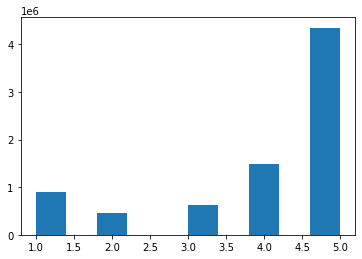

In [11]:
plt.hist(commerce_data['rating'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


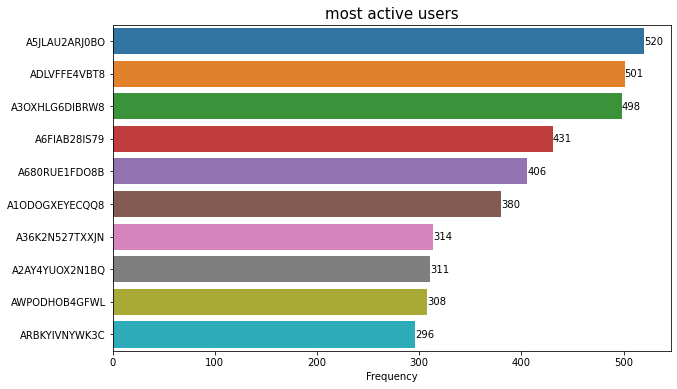

In [12]:
plt.figure(figsize=(10,6))
user_freq=commerce_data['user_id'].value_counts().head(10)
ax=sns.barplot(user_freq,user_freq.index,orient='h')
abs_values=user_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('most active users',size=15)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


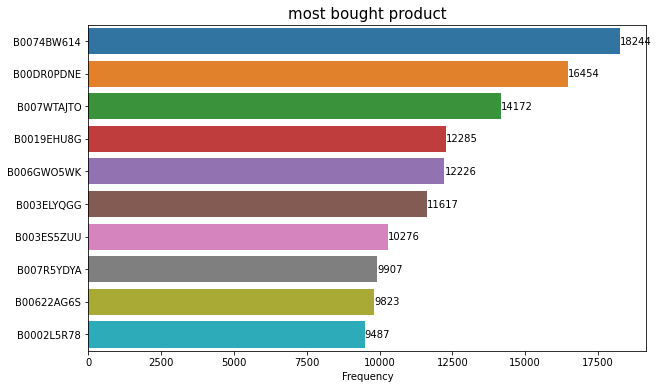

In [13]:
plt.figure(figsize=(10,6))
prd_freq=commerce_data['product_id'].value_counts().head(10)
ax=sns.barplot(prd_freq,prd_freq.index,orient='h')
abs_values=prd_freq.values   
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.xlabel('Frequency')
plt.title('most bought product',size=15)
plt.show()

# Popularity Based system

In [14]:
num_rating_df=commerce_data.groupby('product_id').count()['rating'].reset_index()
num_rating_df.rename(columns={'rating':'num_rating'},inplace=True)
num_rating_df

,product_id,num_rating
0,0132793040,1
1,0321732944,1
2,0439886341,3
3,0511189877,6
4,0528881469,27
...,...,...
475997,BT008G3W52,1
475998,BT008SXQ4C,1
475999,BT008T2BGK,1
476000,BT008UKTMW,15


In [15]:
avg_rating_df=commerce_data.groupby('product_id').mean()['rating'].reset_index().round(2)
avg_rating_df.rename(columns={'rating':'avg_rating'},inplace= True)
avg_rating_df

,product_id,avg_rating
0,0132793040,5.00
1,0321732944,5.00
2,0439886341,1.67
3,0511189877,4.50
4,0528881469,2.85
...,...,...
475997,BT008G3W52,5.00
475998,BT008SXQ4C,1.00
475999,BT008T2BGK,5.00
476000,BT008UKTMW,4.00


In [16]:
popular_df=num_rating_df.merge(avg_rating_df,on='product_id')
popular_df

,product_id,num_rating,avg_rating
0,0132793040,1,5.00
1,0321732944,1,5.00
2,0439886341,3,1.67
3,0511189877,6,4.50
4,0528881469,27,2.85
...,...,...,...
475997,BT008G3W52,1,5.00
475998,BT008SXQ4C,1,1.00
475999,BT008T2BGK,1,5.00
476000,BT008UKTMW,15,4.00


In [17]:
popular_10_product=popular_df[popular_df['num_rating']>=100].sort_values('avg_rating',ascending=False).head(10)
popular_10_product

,product_id,num_rating,avg_rating
454884,B00GMRCAC6,187,4.95
346016,B008I6RVZU,103,4.95
414879,B00CG70K78,237,4.95
6014,B000053HC5,166,4.95
354040,B008VGCT9K,230,4.94
449323,B00FX9WJNO,145,4.92
166101,B0033PRWSW,387,4.90
324655,B007SZ0E1K,449,4.90
278240,B005LJQPE0,255,4.89
324657,B007SZ0EHE,133,4.89


# Collaborative base Item to Item

In [18]:
x= commerce_data.groupby('user_id').count()['product_id']>=50
active_user=x[x].index
active_user

Index(['A100UD67AHFODS', 'A100WO06OQR8BQ', 'A105S56ODHGJEK', 'A105TOJ6LTVMBG',
       'A10AFVU66A79Y1', 'A10H24TDLK2VDP', 'A10NMELR4KX0J6', 'A10O7THJ2O20AG',
       'A10PEXB6XAQ5XF', 'A10X9ME6R66JDX',
       ...
       'AYOTEJ617O60K', 'AYP0YPLSP9ISM', 'AZ515FFZ7I2P7', 'AZ8XSDMIX04VJ',
       'AZAC8O310IK4E', 'AZBXKUH4AIW3X', 'AZCE11PSTCH1L', 'AZMY6E8B52L2T',
       'AZNUHQSHZHSUE', 'AZOK5STV85FBJ'],
      dtype='object', name='user_id', length=1540)

In [19]:
popular_user_df=commerce_data[commerce_data['user_id'].isin(active_user)]
popular_user_df

,user_id,product_id,rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0
...,...,...,...
7824426,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
7824427,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
7824436,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
7824438,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0


In [20]:
y=popular_user_df.groupby('product_id').count()['rating']>25
popular_products=y[y].index

In [21]:
final_data=popular_user_df[popular_user_df['product_id'].isin(popular_products)]
final_data

,user_id,product_id,rating
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0
72059,AU627A4UGIW6V,B00004ZCJE,5.0
72077,A16RL0RMRF974O,B00004ZCJE,5.0
72121,AR8LWDT6TUKNZ,B00004ZCJE,5.0
72122,AD9ZL63H0VKCZ,B00004ZCJE,5.0
...,...,...,...
7820340,AIJQU979J6UFY,B00K91DB7Y,4.0
7820346,ALDAF4VVLFRHP,B00K91DB7Y,4.0
7820356,A1BT6TL7UCIC5Y,B00K91DB7Y,5.0
7820367,A3M7BCQKSQAK4L,B00K91DB7Y,5.0


In [22]:
#https://www.amazon.in/s?k=0132793040&rh=n%3A1389401031&ref=nb_sb_noss

In [23]:
final_data['link_seg_1']='https://www.amazon.in/s?k='
final_data['link_seg_2']='&rh=n%3A1389401031&ref=nb_sb_noss'
final_data['Item_link']=final_data[['link_seg_1','product_id','link_seg_2']].apply("".join, axis=1)


C:\Users\DELL\AppData\Local\Temp/ipykernel_13552/2772414081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['link_seg_1']='https://www.amazon.in/s?k='
C:\Users\DELL\AppData\Local\Temp/ipykernel_13552/2772414081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['link_seg_2']='&rh=n%3A1389401031&ref=nb_sb_noss'
C:\Users\DELL\AppData\Local\Temp/ipykernel_13552/2772414081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [24]:
pt=final_data.pivot_table(values='rating',index='product_id',columns='user_id')
pt.fillna(0, inplace=True)
pt

user_id,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
product_id,,,,,,,,,,,,,,,,,,,,,
B00004ZCJE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005LEN4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005T3G0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
B000067RT6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00006B7DA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00IVFDZBC,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00JC5Y6WM,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00JF0D7RE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
similarity_score_c=cosine_similarity(pt)
similarity_score_c

array([[1.        , 0.10415475, 0.10691223, ..., 0.04328465, 0.04724751,
        0.03932177],
       [0.10415475, 1.        , 0.        , ..., 0.        , 0.02599587,
        0.        ],
       [0.10691223, 0.        , 1.        , ..., 0.03692452, 0.        ,
        0.03438254],
       ...,
       [0.04328465, 0.        , 0.03692452, ..., 1.        , 0.03762734,
        0.        ],
       [0.04724751, 0.02599587, 0.        , ..., 0.03762734, 1.        ,
        0.11887544],
       [0.03932177, 0.        , 0.03438254, ..., 0.        , 0.11887544,
        1.        ]])

In [26]:
similarity_score_c.shape

(368, 368)

In [27]:
index=np.where(pt.index=='B00JP12170')[0][0]
similar_items=sorted(list(enumerate(similarity_score_c[index])), key=lambda x:x[1] , reverse=True) [1:6]
similar_items

for i in similar_items:
    print (pt.index[i[0]])

B009HQCAPQ
B00BOHNYU6
B00EOE4G4E
B0079TOEQQ
B004CLYEFK


In [28]:
def recommend(item_ID):
    index=np.where(pt.index==item_ID)[0][0]
    similar_items=sorted(list(enumerate(similarity_score_c[index])), key=lambda x:x[1] , reverse=True) [1:6]
    similar_items

    for i in similar_items:
        print (pt.index[i[0]])

In [29]:
recommend('B00004ZCJE')

B004TJ6JH6
B00007E7JU
B000KO0GY6
B002ZIMEMW
B000QUUFRW


In [30]:
similarity_score_e=euclidean_distances(pt)

In [31]:
similarity_score_e[0]

array([ 0.        , 43.22036557, 43.19722213, 48.38388161, 43.89760814,
       42.08325083, 44.36214603, 46.5295605 , 42.3083916 , 43.28972164,
       46.38965402, 46.04345773, 46.55104725, 45.69463864, 43.15089802,
       51.42956348, 44.37341546, 42.59107888, 43.84062043, 43.52011029,
       44.45222154, 40.58324778, 49.29503018, 46.88283268, 45.86937976,
       44.38468204, 46.9041576 , 49.12229636, 42.24926035, 48.92851929,
       50.41825066, 41.21892769, 51.59457336, 44.        , 44.23799272,
       45.21061822, 70.60453243, 44.39594576, 44.68780594, 49.92995093,
       53.75872022, 43.71498599, 44.41846463, 45.66180023, 43.13930922,
       42.73172124, 42.04759208, 52.11525688, 44.06812907, 45.26588119,
       46.36809248, 42.84857057, 44.20407221, 44.78839135, 45.97825573,
       52.41183073, 57.78408085, 43.28972164, 46.62617291, 45.475268  ,
       41.32795664, 42.77849927, 51.29327441, 46.08687449, 44.45222154,
       43.2087954 , 43.30127019, 43.46262762, 43.16248371, 45.16

In [32]:
similarity_score_e.shape

(368, 368)

In [33]:
sorted(list(enumerate(similarity_score_e[0])),key=lambda x:x[1],reverse=True)[1:6]

[(36, 70.60453243241541),
 (251, 70.26378868236469),
 (236, 67.19374970932937),
 (246, 64.83054835492293),
 (243, 62.473994589749104)]

In [34]:
def recommend_e(item_ID):
    index=np.where(pt.index==item_ID)[0][0]
    similar_items=sorted(list(enumerate(similarity_score_e[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    for i in similar_items:
        print(pt.index[i[0]])

In [35]:
recommend_e('B00004ZCJE')

B000N99BBC
B0088CJT4U
B007WTAJTO
B00829TIEK
B00829THK0


In [36]:
final_data

,user_id,product_id,rating,link_seg_1,link_seg_2,Item_link
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00004ZCJE&rh=n%3A13...
72059,AU627A4UGIW6V,B00004ZCJE,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00004ZCJE&rh=n%3A13...
72077,A16RL0RMRF974O,B00004ZCJE,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00004ZCJE&rh=n%3A13...
72121,AR8LWDT6TUKNZ,B00004ZCJE,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00004ZCJE&rh=n%3A13...
72122,AD9ZL63H0VKCZ,B00004ZCJE,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00004ZCJE&rh=n%3A13...
...,...,...,...,...,...,...
7820340,AIJQU979J6UFY,B00K91DB7Y,4.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00K91DB7Y&rh=n%3A13...
7820346,ALDAF4VVLFRHP,B00K91DB7Y,4.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00K91DB7Y&rh=n%3A13...
7820356,A1BT6TL7UCIC5Y,B00K91DB7Y,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00K91DB7Y&rh=n%3A13...
7820367,A3M7BCQKSQAK4L,B00K91DB7Y,5.0,https://www.amazon.in/s?k=,&rh=n%3A1389401031&ref=nb_sb_noss,https://www.amazon.in/s?k=B00K91DB7Y&rh=n%3A13...


In [37]:
import pickle
pickle.dump(popular_10_product,open('popular.pkl','wb'))
pickle.dump(similarity_score_c,open('similarity_scores.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(final_data,open('items.pkl','wb'))